In [1]:
# -*- coding: utf-8
# Reinaldo Chaves (@paidatocandeira)
# Acessa o arquivo criado com pagamentos de empenho da covid19
# E faz diversas estatísticas
#

In [84]:
import pandas as pd

In [85]:
pd.options.display.float_format = '{:,.2f}'.format

In [86]:
kwargs = {'sep': ',', 'dtype': str, 'encoding': 'utf-8'}
pagamentos_covid19 = pd.read_csv("resultados/pagamentos_feitos_de_empenhos_covid19_ate_21_maio_2020.csv", **kwargs)

In [87]:
# Carrega nomes de colunas

In [88]:
list(pagamentos_covid19.columns.values.tolist())

['Id Empenho',
 'Código Empenho',
 'Código Empenho Resumido',
 'Data Emissão_x',
 'Código Tipo Documento_x',
 'Tipo Documento_x',
 'Tipo Empenho',
 'Espécie Empenho',
 'Código Órgão Superior_x',
 'Órgão Superior_x',
 'Código Órgão_x',
 'Órgão_x',
 'Código Unidade Gestora_x',
 'Unidade Gestora_x',
 'Código Gestão_x',
 'Gestão_x',
 'Código Favorecido_x',
 'Favorecido_x',
 'Observação_x',
 'Código Esfera Orçamentária',
 'Esfera Orçamentária',
 'Código Tipo Crédito',
 'Tipo Crédito',
 'Código Grupo Fonte Recurso',
 'Grupo Fonte Recurso',
 'Código Fonte Recurso',
 'Fonte Recurso',
 'Código Unidade Orçamentária',
 'Unidade Orçamentária',
 'Código Função',
 'Função',
 'Código SubFunção',
 'SubFunção',
 'Código Programa',
 'Programa',
 'Código Ação',
 'Ação',
 'Linguagem Cidadã',
 'Código Subtítulo (Localizador)',
 'Subtítulo (Localizador)',
 'Código Plano Orçamentário_x',
 'Plano Orçamentário_x',
 'Código Programa Governo_x',
 'Nome Programa Governo_x',
 'Autor Emenda',
 'Código Categoria de 

In [89]:
# Quantidade de favorecidos nos pagamentos

In [90]:
a = len(pagamentos_covid19['Favorecido_x'].value_counts())
a

1980

In [91]:
# Transforma em numero campos de valores

In [92]:
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].str.replace(',','.')
pagamentos_covid19['Valor Original do Empenho'] = pagamentos_covid19['Valor Original do Empenho'].astype('float64') 

pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Empenho Convertido pra R$'] = pagamentos_covid19['Valor do Empenho Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_x'] = pagamentos_covid19['Valor Utilizado na Conversão_x'].astype('float64') 

pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Pago (R$)'] = pagamentos_covid19['Valor Pago (R$)'].astype('float64') 
pagamentos_covid19.rename(columns = {'Valor Pago (R$)':'valor_pago_em_real'},inplace = True)

pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Inscritos (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'] = pagamentos_covid19['Valor Restos a Pagar Cancelado (R$)'].astype('float64') 

pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].str.replace(',','.')
pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'] = pagamentos_covid19['Valor Restos a Pagar Pagos (R$)'].astype('float64') 

pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].str.replace(',','.')
pagamentos_covid19['Valor Original do Pagamento'] = pagamentos_covid19['Valor Original do Pagamento'].astype('float64') 

pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].str.replace(',','.')
pagamentos_covid19['Valor do Pagamento Convertido pra R$'] = pagamentos_covid19['Valor do Pagamento Convertido pra R$'].astype('float64') 

pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].str.replace(',','.')
pagamentos_covid19['Valor Utilizado na Conversão_y'] = pagamentos_covid19['Valor Utilizado na Conversão_y'].astype('float64') 

In [93]:
pagamentos_covid19['valor_pago_em_real'].sum()

9322037425.91

In [94]:
pagamentos_covid19['Valor Original do Empenho'].sum()

23563705891.49

In [95]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].sum()

22892015120.16

In [ ]:
# Média de valores pagos

In [153]:
pagamentos_covid19['valor_pago_em_real'].mean()

1169494.0943306987

In [ ]:
# Mediana de valores pagos

In [154]:
pagamentos_covid19['valor_pago_em_real'].median()

2700.0

In [ ]:
# Moda de valores pagos

In [155]:
pagamentos_covid19['valor_pago_em_real'].mode()

0   442.50
dtype: float64

In [156]:
procura = pagamentos_covid19[(pagamentos_covid19['valor_pago_em_real'] == 442.50)]

In [157]:
procura.shape

(249, 103)

In [158]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
856,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009243/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
857,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009241/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
858,24/03/2020,120638000012020NE000019,160400393,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE CAMPO GRANDE,120638,GRUPAMENTO DE APOIO DE CAMPO GRANDE,"31,405.70",442.50,0.00,DIARIAS DE MILITARES DA ALA-5.,PROC 009238/20 DOC GERADO PELO SCDP. PCDP 0092...,Não se Aplica
2899,03/04/2020,200330000012020NE000069,184500039,Ministério da Justiça e Segurança Pública - U,SECRETARIA NACIONAL DE SEG. PÚBLICA - SENASP,200330,SECRETARIA NACIONAL DE SEG. PUBLICA - SENASP,"800,000.00",442.50,0.00,EMISSAO DE EMPENHO PARA COBRIR DESPESAS COM DI...,PROC 009717/20 DOC GERADO PELO SCDP. PCDP 0097...,Não se Aplica
2901,03/04/2020,200330000012020NE000069,184500039,Ministério da Justiça e Segurança Pública - U,SECRETARIA NACIONAL DE SEG. PÚBLICA - SENASP,200330,SECRETARIA NACIONAL DE SEG. PUBLICA - SENASP,"800,000.00",442.50,0.00,EMISSAO DE EMPENHO PARA COBRIR DESPESAS COM DI...,PROC 009791/20 DOC GERADO PELO SCDP. PCDP 0097...,Não se Aplica
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,16/04/2020,194151192082020NE000032,172900706,Fundação Nacional do Índio,FUNAI-DIRETORIA DE PROTEÇÃO TERRITORIAL,PF0023COV,AUXILIO FINACEIRO - ACAO DE COMBATE AO COVID 19,"130,000.00",442.50,0.00,COBRIR DESPESAS COM DIARIAS DE SERVIDOR E DE C...,PROC 001054/20 DOC GERADO PELO SCDP. PCDP 0010...,Não se Aplica
5776,16/04/2020,194151192082020NE000032,172900706,Fundação Nacional do Índio,FUNAI-DIRETORIA DE PROTEÇÃO TERRITORIAL,PF0023COV,AUXILIO FINACEIRO - ACAO DE COMBATE AO COVID 19,"130,000.00",442.50,0.00,COBRIR DESPESAS COM DIARIAS DE SERVIDOR E DE C...,PROC 001056/20 DOC GERADO PELO SCDP. PCDP 0010...,Não se Aplica
5993,09/04/2020,200117000012020NE000126,176300500,Departamento de Polícia Rodoviária Federal,SUPERINTENDENCIA REG. POL. RODV. FEDERAL-SP,-11,Informação protegida por sigilo nos termos da ...,"95,121.60",442.50,0.00,Informação protegida por sigilo nos termos da ...,Informação protegida por sigilo nos termos da ...,Não se Aplica
6531,12/03/2020,120006000012020NE000025,155306009,Comando da Aeronáutica,GRUPAMENTO DE APOIO DE BRASILIA,120006,GRUPAMENTO DE APOIO DE BRASILIA,"8,000.00",442.50,0.00,ATENDER AS NECESSIDADES DA SEFA ...,PAGAMENTO DE DIARIA - OPERACAO REGRESSO A PAT...,Não se Aplica


In [96]:
# Maior valor originalmente empenhado

In [97]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].max()

694320000.0

In [98]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmax()][["Data Emissão_x", "Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                03/04/2020
Código Empenho                                                   250005000012020NE000096
Id Empenho                                                                     176600022
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                              DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG
Código Favorecido_x                                                            EX2590112
Favorecido_x                                          GLOBAL BASE DEVELOPMENT HK LIMITED
Valor do Empenho Convertido pra R$                                        694,320,000.00
valor_pago_em_real                                                         21,965,856.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           ATNDER DESPESAS COM AQUISICAO DE MASCARA SMS 3...
Observação_y         

In [99]:
# Menor valor originalmente empenhado

In [100]:
pagamentos_covid19['Valor do Empenho Convertido pra R$'].min()

1.0

In [101]:
pagamentos_covid19.loc[pagamentos_covid19['Valor do Empenho Convertido pra R$'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y", "Modalidade de Licitação"]]

Data Emissão_x                                                                24/03/2020
Código Empenho                                                   155001152752020NE516283
Id Empenho                                                                     167200532
Órgão_x                                             Hospital de Clínicas de Porto Alegre
Unidade Gestora_x                                   HOSPITAL DE CLINICAS DE PORTO ALEGRE
Código Favorecido_x                                                       91154310000116
Favorecido_x                           3 F COMERCIO DE EQUIPAMENTOS DE PROTECAO INDIV...
Valor do Empenho Convertido pra R$                                                  1.00
valor_pago_em_real                                                                319.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                                            MATERIAL DE PROTECAO E SEGURANCA
Observação_y         

In [102]:
# Maior valor pago em real 

In [103]:
pagamentos_covid19['valor_pago_em_real'].max()

440894813.73

In [104]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                09/04/2020
Código Empenho                                                   257001000012020NE810544
Id Empenho                                                                     174800424
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                             DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Código Favorecido_x                                                               257001
Favorecido_x                                  DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE
Valor do Empenho Convertido pra R$                                        440,894,813.73
valor_pago_em_real                                                        440,894,813.73
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...
Observação_y         

In [105]:
# Menor valor pago em real 

In [106]:
pagamentos_covid19['valor_pago_em_real'].min()

-2169600.0

In [107]:
pagamentos_covid19.loc[pagamentos_covid19['valor_pago_em_real'].idxmin()][["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                25/03/2020
Código Empenho                                                   250005000012020NE000076
Id Empenho                                                                     168900527
Órgão_x                                    Ministério da Saúde - Unidades com vínculo di
Unidade Gestora_x                              DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG
Código Favorecido_x                                                       01057428000214
Favorecido_x                                      DESCARPACK DESCARTAVEIS DO BRASIL LTDA
Valor do Empenho Convertido pra R$                                          2,960,000.00
valor_pago_em_real                                                         -2,169,600.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x                           ATENDER DESPESAS COM TOUCA HOSPITALAR, LUVA P,...
Observação_y         

In [108]:
# Agrupa a soma de valores pagos em Código Empenho+Id Empenho 

In [109]:
pagamentos_covid19.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
2336,257001000012020NE810544,174800424,"440,894,813.73"
2185,257001000012020NE453964,177001678,"415,121,875.00"
2321,257001000012020NE810529,178400461,"360,266,482.23"
2363,257001000012020NE810606,174400477,"255,666,189.57"
2329,257001000012020NE810537,186700428,"248,858,444.64"
...,...,...,...
3726,731060000012020NE000008,148905662,0.00
1653,160513000012020NE800133,178901079,0.00
1654,160513000012020NE800134,177001165,0.00
317,153031152502020NE800839,182901746,0.00


In [110]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Empenho'] == '257001000012020NE810544') & (pagamentos_covid19['Id Empenho'] == '174800424')]

In [111]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
6375,09/04/2020,257001000012020NE810544,174800424,Ministério da Saúde - Unidades com vínculo di,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"440,894,813.73","440,894,813.73",0.00,CORONAVIRUS (COVID-19)MUNICIPAL_PARCELA_UNICA_...,PAGAMENTO DE 65702-CORONAVIRUS (COVID-19) PARC...,Não se Aplica


In [112]:
# Agrupa a soma de valores pagos em Unidade Gestora - 20 primeiros

In [113]:
pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Unidade Gestora_x,valor_pago_em_real
274,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,"7,449,583,123.89"
332,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"934,224,738.81"
267,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,"559,089,833.02"
330,FUNDAÇÃO OSWALDO CRUZ,"64,138,126.53"
238,COORDENAÇÃO GERAL DE INFRAESTRUTURA DOS CAMPI,"51,148,956.55"
399,SECR. DE GESTAO DO TRAB. E DA EDUC. NA SAUDE,"37,225,741.00"
398,PRO-REITORIA DE PESQUISA/UFMG,"19,416,329.30"
347,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"16,730,697.84"
146,CENTRO DE AQUISIÇÕES ESPECÍFICAS,"16,636,826.21"
400,SECRETARIA NACIONAL DE AVIAÇÃO CIVIL,"16,618,496.55"


In [114]:
# Salva em CSV para gráfico

In [115]:
salva = pagamentos_covid19.groupby(["Unidade Gestora_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [116]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 274 to 404
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unidade Gestora_x   453 non-null    object 
 1   valor_pago_em_real  453 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.6+ KB


In [117]:
salva.to_csv('resultados/graficos/soma_ordenada_unidade_gestora_pagamentos_feitos_de_empenhos_covid19_ate_21_maio_2020.csv', index=False)

In [118]:
# Detalha DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG

In [119]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
5,GLOBAL BASE DEVELOPMENT HK LIMITED,"241,416,747.00"
7,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"141,900,000.00"
13,MAGNAMED TECNOLOGIA MEDICA S/A,"129,020,160.00"
3,DESCARPACK DESCARTAVEIS DO BRASIL LTDA,"30,544,000.00"
11,LEISTUNG EQUIPAMENTOS LTDA.,"6,000,000.00"
14,NACIONAL COMERCIAL HOSPITALAR S.A.,"2,280,000.00"
12,LIMA & PERGHER INDUSTRIA E COMERCIO S/A,"2,081,220.80"
4,FUTURA DISTRIBUIDORA DE MEDICAMENTOS E PRODUTO...,"2,040,000.00"
0,3M DO BRASIL LTDA,"1,795,000.00"
10,"KTK INDUSTRIA, IMPORTACAO, EXPORTACAO E COMERC...","900,000.00"


In [120]:
procura['valor_pago_em_real'].sum()

559089833.02

In [121]:
# FUNDO NACIONAL DE ASSISTENCIA SOCIAL

In [122]:
procura = pagamentos_covid19[(pagamentos_covid19['Unidade Gestora_x'] == 'FUNDO NACIONAL DE ASSISTENCIA SOCIAL') ]
procura.groupby(["Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,valor_pago_em_real
0,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,"934,224,738.81"


In [123]:
# Agrupa a soma de valores pagos em Gestão - 20 primeiros

In [124]:
pagamentos_covid19.groupby(["Gestão_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Gestão_x,valor_pago_em_real
23,TESOURO NACIONAL,"9,101,815,086.03"
4,FUNDACAO OSWALDO CRUZ,"135,875,970.23"
30,UNIVERSIDADE FEDERAL DE MINAS GERAIS,"19,423,983.02"
12,HOSPITAL DE CLINICAS DE PORTO ALEGRE,"16,730,697.84"
2,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"11,702,123.92"
14,"INST.FED.DE EDUC.,CIENC.E TEC.DE GOIAS","6,490,000.00"
31,UNIVERSIDADE FEDERAL DE PERNAMBUCO,"5,413,259.35"
7,FUNDACAO UNIVERSIDADE FEDERAL DE PELOTAS,"5,160,647.46"
25,UNIVERSIDADE FEDERAL DE ALAGOAS,"3,665,613.00"
0,COMPANHIA NACIONAL DE ABASTECIMENTO,"3,503,430.52"


In [125]:
# Agrupa a soma de valores pagos em Favorecido - 20 primeiros

In [126]:
pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Favorecido_x,Código Favorecido_x,valor_pago_em_real
400,DIRETORIA EXECUTIVA DO FUNDO NAC. DE SAUDE,257001,"5,534,884,190.89"
1389,FUNDO NACIONAL DE ASSISTENCIA SOCIAL,330013,"934,224,738.81"
1856,ORGANIZACAO PAN-AMERICANA DA SAUDE/ORGANIZACAO...,04096431000154,"432,376,875.00"
1421,GLOBAL BASE DEVELOPMENT HK LIMITED,EX2590112,"241,416,747.00"
623,FUNDO ESTADUAL DE SAUDE - FUNDES,13851748000140,"152,861,216.00"
1515,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,49520521000169,"141,900,000.00"
1683,MAGNAMED TECNOLOGIA MEDICA S/A,01298443000254,"129,020,160.00"
619,FUNDO ESTADUAL DE SAUDE,74031865000151,"105,970,421.00"
624,FUNDO ESTADUAL DE SAUDE DE PERNAMBUCO,11430018000140,"54,921,718.00"
625,FUNDO ESTADUAL DE SAUDE DO ESTADO DA BAHIA,05816630000152,"54,869,588.00"


In [127]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == '49520521000169') ]

In [128]:
procura.groupby(["Código Empenho", "Id Empenho"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

,Código Empenho,Id Empenho,valor_pago_em_real
0,250005000012020NE000104,178500504,"141,900,000.00"


In [129]:
procura[["Data Emissão_x","Código Empenho", "Id Empenho", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

,Data Emissão_x,Código Empenho,Id Empenho,Órgão_x,Unidade Gestora_x,Código Favorecido_x,Favorecido_x,Valor do Empenho Convertido pra R$,valor_pago_em_real,Valor Restos a Pagar Inscritos (R$),Observação_x,Observação_y,Modalidade de Licitação
7613,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","8,301,150.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,IN 1234/2012,Não se Aplica
7614,13/04/2020,250005000012020NE000104,178500504,Ministério da Saúde - Unidades com vínculo di,DEPARTAMENTO DE LOGISTICA EM SAUDE - DLOG,49520521000169,INTERMED EQUIPAMENTO MEDICO HOSPITALAR LTDA,"258,000,000.00","133,598,850.00",0.00,ATENDER DESPESAS COM AQUISICAO DE 4.300 VENTIL...,PGTO PARA EMPRESA INTERMED EQUIPAMENTOS REF. A...,Não se Aplica


In [130]:
procura = pagamentos_covid19[(pagamentos_covid19['Código Favorecido_x'] == 'EX2590112') ]

In [131]:
procura['valor_pago_em_real'].sum()

241416747.0

In [132]:
# Salva um CSV para criar gráfico

In [133]:
salva = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [134]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 400 to 467
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Favorecido_x         2254 non-null   object 
 1   Código Favorecido_x  2254 non-null   object 
 2   valor_pago_em_real   2254 non-null   float64
dtypes: float64(1), object(2)
memory usage: 70.4+ KB


In [135]:
salva.to_csv('resultados/graficos/soma_ordenada_favorecidos_pagamentos_feitos_de_empenhos_covid19_ate_21_maio_2020.csv', index=False)

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [137]:
graf = pagamentos_covid19.groupby(["Favorecido_x", "Código Favorecido_x"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(15)
graf.rename(columns = {'Favorecido_x':'instituicao_empresa_favorecida'},inplace = True)
graf.rename(columns = {'Código Favorecido_x':'cod_favorecido'},inplace = True)

In [138]:
graf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 400 to 521
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   instituicao_empresa_favorecida  15 non-null     object 
 1   cod_favorecido                  15 non-null     object 
 2   valor_pago_em_real              15 non-null     float64
dtypes: float64(1), object(2)
memory usage: 480.0+ bytes


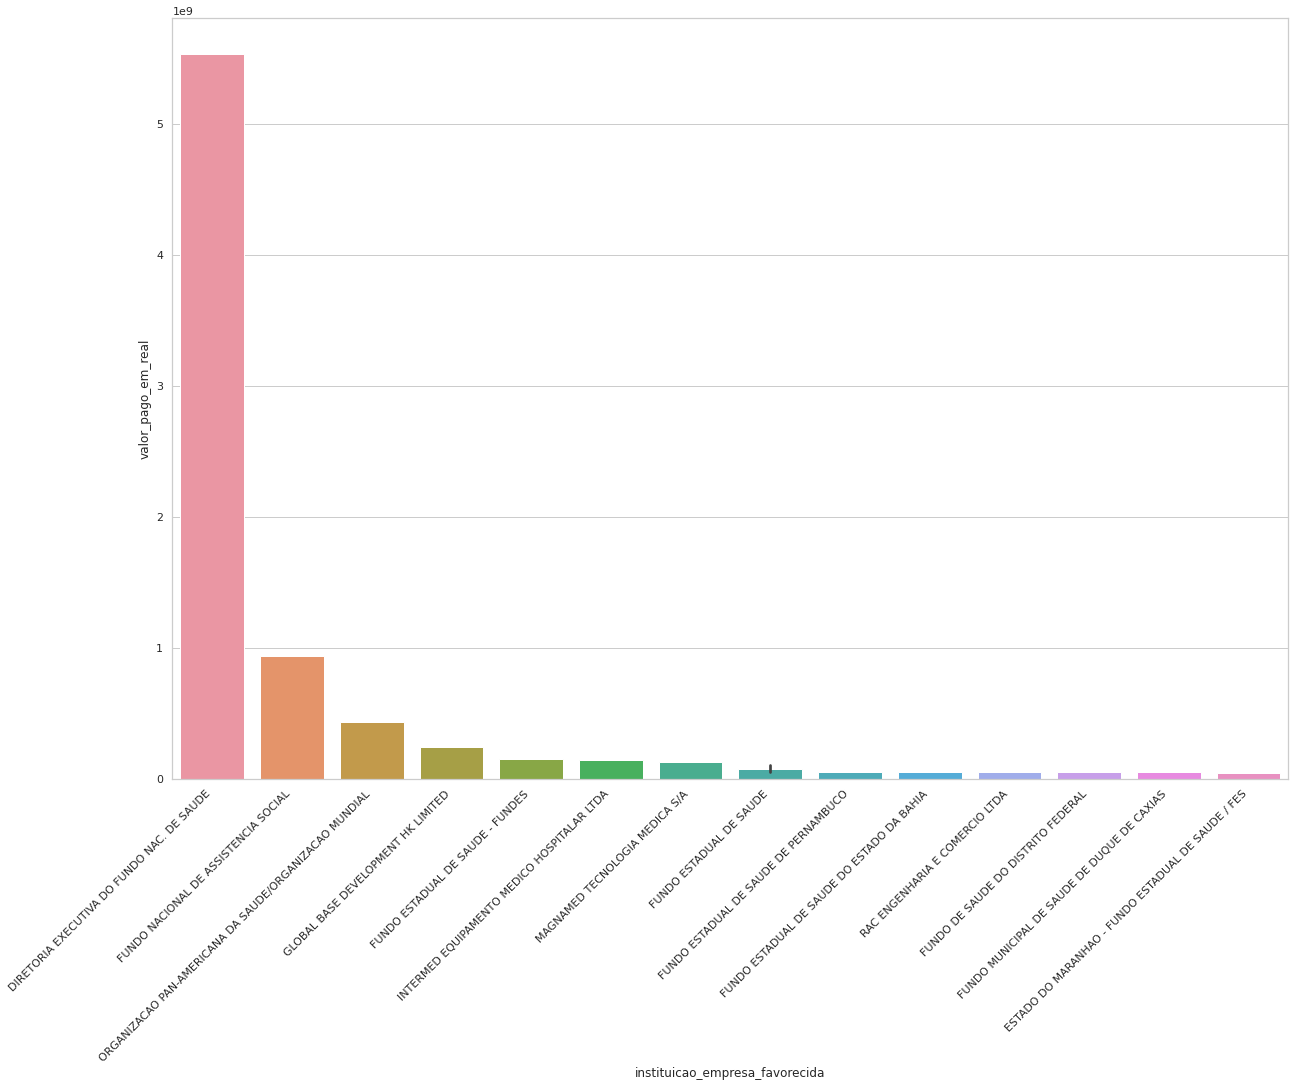

In [139]:
sns.set(style="whitegrid")

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=45, ha='right')

ax = sns.barplot(x="instituicao_empresa_favorecida", y="valor_pago_em_real", data=graf)

In [140]:
# Soma valores em sigilo

In [141]:
sigilo = pagamentos_covid19[(pagamentos_covid19['Favorecido_x'] == 'Informação protegida por sigilo nos termos da legislaçã') |  
                           (pagamentos_covid19['Código Favorecido_x'] == '-11')]

In [142]:
sigilo['valor_pago_em_real'].sum()

747347.1099999999

In [143]:
# Máximo em sigilo

In [144]:
sigilo.loc[sigilo['valor_pago_em_real'].idxmax()][["Data Emissão_x","Código Empenho", "Id Empenho", "Código Empenho Resumido", "Órgão_x", "Unidade Gestora_x", "Código Favorecido_x", "Favorecido_x", "Valor do Empenho Convertido pra R$", "valor_pago_em_real", "Valor Restos a Pagar Inscritos (R$)", "Observação_x", "Observação_y",  "Modalidade de Licitação"]]

Data Emissão_x                                                                02/04/2020
Código Empenho                                                   160062000012020NE000055
Id Empenho                                                                     184000107
Código Empenho Resumido                                                     2020NE000055
Órgão_x                                                              Comando do Exército
Unidade Gestora_x                                     CENTRO DE INTELIGENCIA DO EXERCITO
Código Favorecido_x                                                                  -11
Favorecido_x                           Informação protegida por sigilo nos termos da ...
Valor do Empenho Convertido pra R$                                            380,000.00
valor_pago_em_real                                                            380,000.00
Valor Restos a Pagar Inscritos (R$)                                                 0.00
Observação_x         

In [145]:
# Soma valores por autores de Emenda

In [146]:
emendas = pagamentos_covid19[(pagamentos_covid19['Autor Emenda'] != 'SEM EMENDA')]

In [147]:
emendas['valor_pago_em_real'].sum()

1482322058.0

In [148]:
emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False).head(20)

,Autor Emenda,valor_pago_em_real
33,BANCADA DO CEARA / EMENDA 14,"180,966,340.00"
0,BANCADA DA BAHIA / EMENDA 4,"126,904,898.00"
32,BANCADA DO AMAZONAS / EMENDA 5,"116,834,308.00"
16,BANCADA DE SAO PAULO / EMENDA 1,"105,421,280.00"
37,BANCADA DO MARANHAO / EMENDA 3,"80,952,724.00"
7,BANCADA DE GOIAS / EMENDA 7,"76,803,508.00"
38,BANCADA DO RIO DE JANEIRO / EMENDA 2,"53,215,190.00"
34,BANCADA DO DISTRITO FEDERAL / EMENDA 3,"50,437,829.00"
15,BANCADA DE RORAIMA / EMENDA 9,"49,014,018.00"
26,BANCADA DE SERGIPE / EMENDA 8,"46,185,111.00"


In [149]:
# Salva em CSV para gráfico

In [150]:
salva = emendas.groupby(["Autor Emenda"]).valor_pago_em_real.sum().reset_index().sort_values("valor_pago_em_real", ascending=False)

In [151]:
salva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 33 to 20
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Autor Emenda        50 non-null     object 
 1   valor_pago_em_real  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [152]:
salva.to_csv('resultados/graficos/soma_ordenada_emendas_pagamentos_feitos_de_empenhos_covid19_ate_21_maio_2020.csv', index=False)